# Amazon Fine Food Reviews Analysis

Data Source: https://www.kaggle.com/snap/amazon-fine-food-reviews

The Amazon Fine Food Reviews dataset consists of reviews of fine foods from Amazon.<br>

Number of reviews: 568,454<br>
Number of users: 256,059<br>
Number of products: 74,258<br>
Timespan: Oct 1999 - Oct 2012<br>
Number of Attributes/Columns in data: 10 

Attribute Information:

1. Id
2. ProductId - unique identifier for the product
3. UserId - unqiue identifier for the user
4. ProfileName
5. HelpfulnessNumerator - number of users who found the review helpful
6. HelpfulnessDenominator - number of users who indicated whether they found the review helpful or not
7. Score - rating between 1 and 5
8. Time - timestamp for the review
9. Summary - brief summary of the review
10. Text - text of the review


## Objective:
Plot a t-SNE data visualization for the customer reviews to classify +ve/-ve using BoW, TFIDF, Avg Word2Vector and TFIDF Word2Vector text processing methods.

In [8]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer


# using the SQLite Table to read data.
con = sqlite3.connect('final.sqlite') 



#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3


In [9]:
#filtering only positive and negative reviews i.e. 
# not taking into consideration those reviews with Score=3
final = pd.read_sql_query(""" SELECT * FROM Reviews WHERE Score != 3 """, con) 

In [10]:
print(final.shape) #looking at the number of attributes and size of the data
final.head()

(364171, 12)


,index,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,CleanText
0,138706,150524,0006641040,ACITT7DI6IDDL,shari zychinski,0,0,positive,939340800,EVERY book is educational,this witty little book makes my son laugh at l...,witti littl book make son laugh loud recit car...
1,138688,150506,0006641040,A2IW4PEEKO2R0U,Tracy,1,1,positive,1194739200,"Love the book, miss the hard cover version","I grew up reading these Sendak books, and watc...",grew read sendak book watch realli rosi movi i...
2,138689,150507,0006641040,A1S4A3IQ2MU7V4,"sally sue ""sally sue""",1,1,positive,1191456000,chicken soup with rice months,This is a fun way for children to learn their ...,fun way children learn month year learn poem t...
3,138690,150508,0006641040,AZGXZ2UUK6X,"Catherine Hallberg ""(Kate)""",1,1,positive,1076025600,a good swingy rhythm for reading aloud,This is a great little book to read aloud- it ...,great littl book read nice rhythm well good re...
4,138691,150509,0006641040,A3CMRKGE0P909G,Teresa,3,4,positive,1018396800,A great way to learn the months,This is a book of poetry about the months of t...,book poetri month year goe month cute littl po...


## Bag of words 

In [11]:
#Here Iam taking only 2K reviews randomly because my laptop has only 4GB ram. 

data_pos = final[final["Score"] == "positive"].sample(n = 1000)  # To get 1k +ve reviews randomly.
data_neg = final[final["Score"] == "negative"].sample(n = 1000)  # To get 1k -ve reviews randomly.
final_2000 = pd.concat([data_pos, data_neg])

In [12]:
score_2000 = final_2000["Score"]

In [13]:
score_2000.shape

(2000,)

In [14]:
final_2000.shape

(2000, 12)

In [15]:
#BoW
count_vect = CountVectorizer() #in scikit-learn
final_counts = count_vect.fit_transform(final_2000['CleanText'].values)

In [16]:
type(final_counts)

scipy.sparse.csr.csr_matrix

In [17]:
final_counts.get_shape()

(2000, 6369)

In [18]:
from sklearn.preprocessing import StandardScaler

std_data = StandardScaler(with_mean = False).fit_transform(final_counts)
std_data.shape

C:\Users\Yagnapooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\Yagnapooja\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(2000, 6369)

In [19]:
# convert sparse to dense as tsne takes dense vector
std_data = std_data.todense()
type(std_data)

numpy.matrixlib.defmatrix.matrix

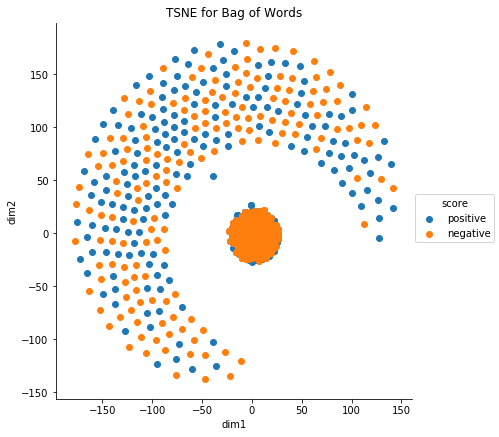

In [20]:
from sklearn.manifold import TSNE
model = TSNE(n_components=2, random_state=0, perplexity = 30, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default perplexity = 30
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000

tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
tsne_data = np.vstack((tsne_data.T, score_2000)).T
tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
sn.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
plt.title("TSNE for Bag of Words")
plt.show()

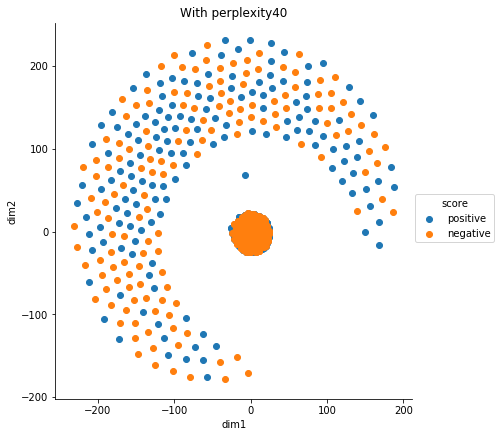

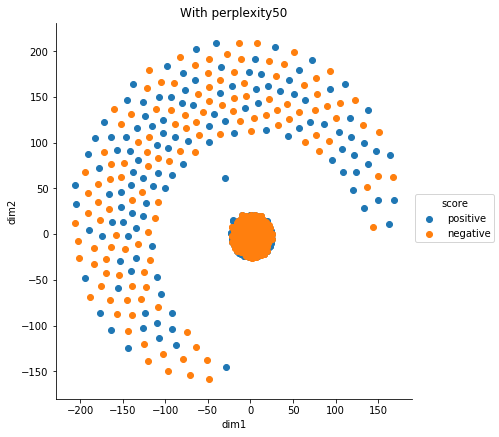

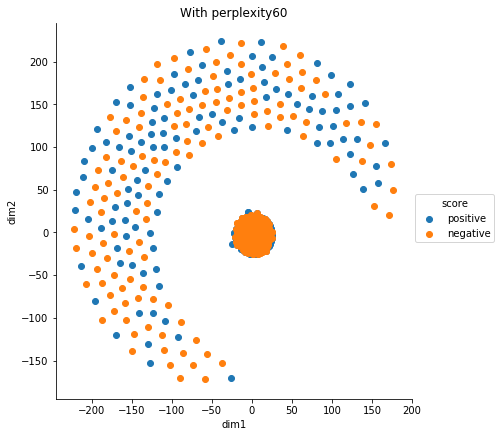

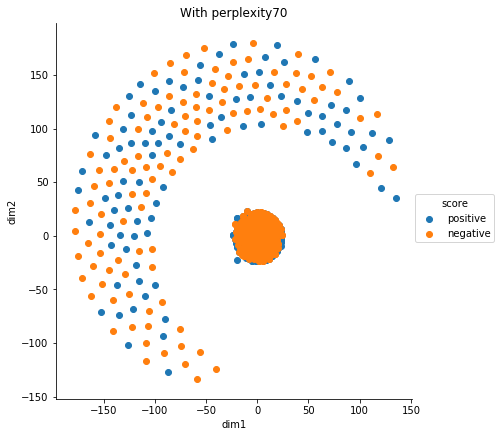

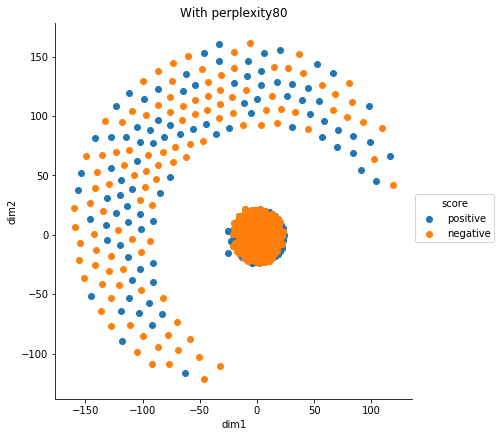

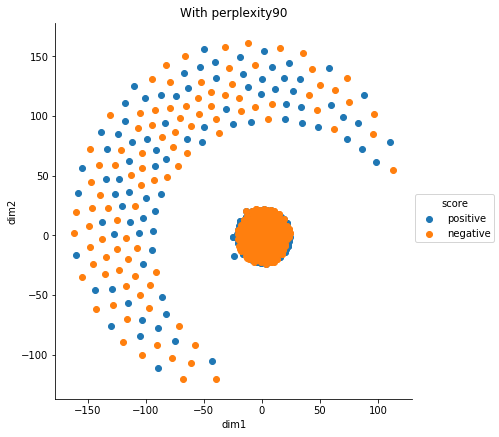

In [22]:
from sklearn.manifold import TSNE
for i in range(40,100,10):
    model = TSNE(n_components=2, random_state=0, perplexity = i, n_iter = 5000)
# configuring the parameteres
# the number of components = 2
# default learning rate = 200
# default Maximum number of iterations for the optimization = 1000
    

    tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, score_2000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("With perplexity" +str(i))
        
    plt.show()

**Observation:**

Here, both positive and negative reviews are unable to seperate because it overlaps each other.

## TF-IDF

In [23]:
# Tf-Idf
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2))
final_tf_idf = tf_idf_vect.fit_transform(final_2000['CleanText'].values)

In [24]:
# Standardization 
from sklearn.preprocessing import StandardScaler
std = StandardScaler(with_mean = False)
std_data = std.fit_transform(final_tf_idf)
# Converting sparse matrix to dense because tnse takes dense vector
std_data = std_data.todense()
std_data.shape

(2000, 64755)

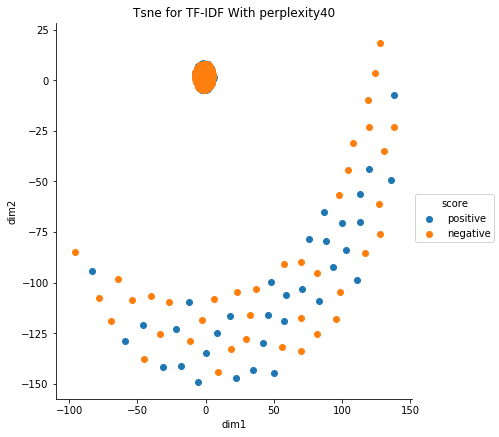

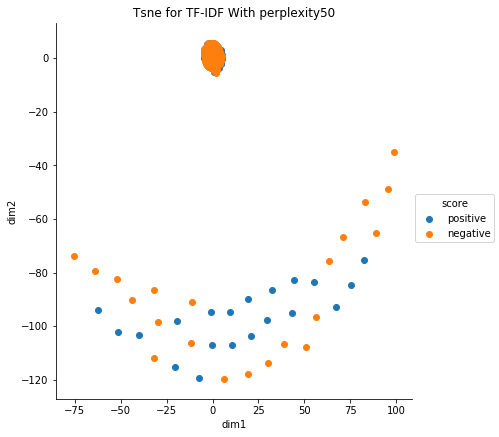

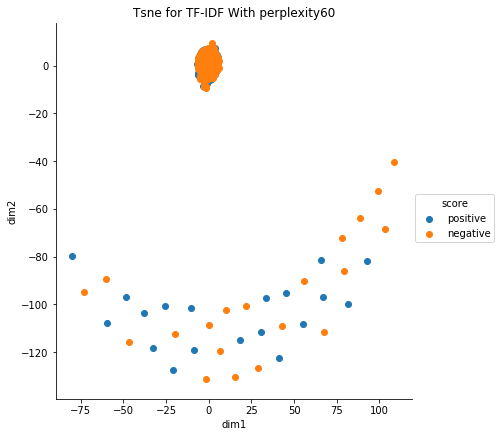

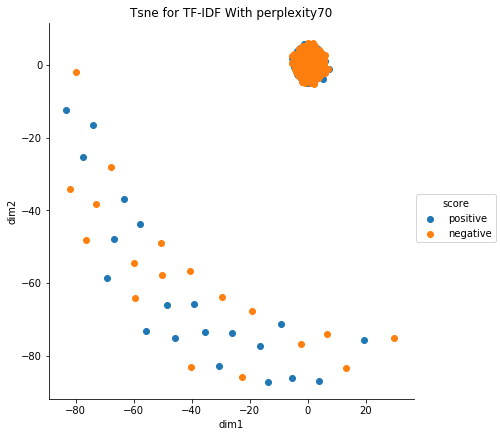

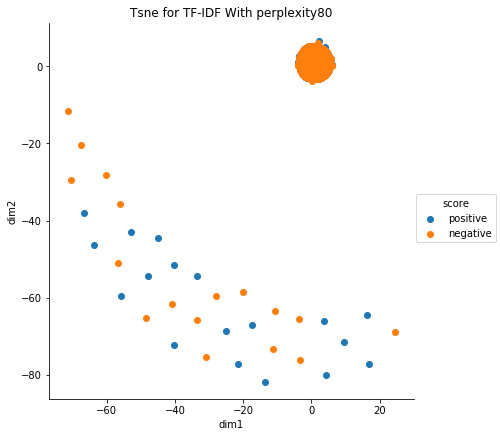

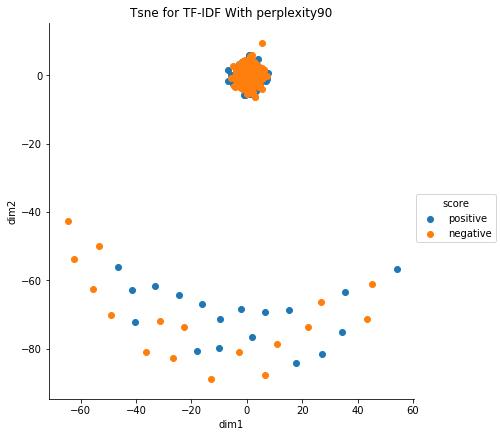

In [25]:
from sklearn.manifold import TSNE
for i in range(40,100,10):
    model = TSNE(n_components=2, random_state=0, perplexity = i, n_iter = 5000)
# the number of components = 2

    tsne_data = model.fit_transform(std_data)


# creating a new data frame which help us in ploting the result data
    tsne_data = np.vstack((tsne_data.T, score_2000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("Tsne for TF-IDF With perplexity" +str(i))
        
    plt.show()

## Word2Vec

In [26]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle

C:\Users\Yagnapooja\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [40]:
import re

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

stop = set(stopwords.words('english')) #set of stopwords
sno = nltk.stem.SnowballStemmer('english') #initialising the snowball stemmer

def cleanhtml(sentence): #function to clean the word of any html-tags
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', sentence)
    return cleantext
def cleanpunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    return  cleaned
print(stop)
print('************************************')
print(sno.stem('tasty'))

{"doesn't", 'weren', 'aren', 'can', "mightn't", 'we', 'couldn', 'such', 'by', 'being', 'with', 'over', "shan't", 'other', 'under', 'ain', 'once', 'out', 'hadn', "wouldn't", 'before', 'he', 'than', 'some', 're', 'shan', 'ma', 's', 'theirs', 'down', "didn't", 'is', 'or', 'into', 'very', 'been', "needn't", 'wasn', 'yourself', 'further', "won't", 'up', 'him', 'were', 'below', 'above', 'own', 'same', "it's", 'don', "mustn't", 'both', "haven't", 'the', 'those', "hasn't", 'my', 'but', 'off', 'himself', 'and', 'll', 'o', 'herself', 'shouldn', 't', 'them', 'will', 'in', 'are', 'that', 'any', 'this', 'have', 'needn', 'now', 'didn', "you're", 'it', 'few', 'so', 'against', 'doing', 'you', 'why', 'myself', 'to', 'for', 'on', "shouldn't", 'does', 'through', 'if', 'just', 'doesn', 'they', 'having', 'mightn', 'after', 'each', 'did', 'how', 'be', 'where', 'do', 'y', 'only', 'a', 'until', 'his', 'more', 'mustn', 'ours', "should've", "you'd", 'your', 'ourselves', 'i', 'her', "that'll", 'these', 'haven', 

In [41]:
import gensim
list_of_sent = []
for sent in final_2000['Text'].values:
    filtered_sentence = []
    sent=cleanhtml(sent)
    for w in sent.split():
        for cleaned_words in cleanpunc(w).split():
            if(cleaned_words.isalpha()):    
                filtered_sentence.append(cleaned_words.lower())
            else:
                continue 
    list_of_sent.append(filtered_sentence)

In [42]:
print(final_2000['Text'].values[0])
print("*****************************************************************")
print(list_of_sent[0])

Love to buy and share these with my co-workers.  Kind of a nice stress reliever. They are a nice combination of sweet and tangy.
*****************************************************************
['love', 'to', 'buy', 'and', 'share', 'these', 'with', 'my', 'kind', 'of', 'a', 'nice', 'stress', 'reliever', 'they', 'are', 'a', 'nice', 'combination', 'of', 'sweet', 'and', 'tangy']


In [43]:
w2v_model=gensim.models.Word2Vec(list_of_sent,min_count=5,size=50, workers=4) 
w2v = w2v_model[w2v_model.wv.vocab]
w2v.shape

(2517, 50)

In [44]:
words = list(w2v_model.wv.vocab)
print(len(words))

2517


In [45]:
w2v_model.wv.most_similar('tasty')

[('fresh', 0.9996085166931152),
 ('healthy', 0.9995614886283875),
 ('dry', 0.9995414018630981),
 ('soft', 0.9994879961013794),
 ('right', 0.9994580745697021),
 ('quite', 0.9994348287582397),
 ('actually', 0.9993892908096313),
 ('stale', 0.9993722438812256),
 ('cheap', 0.9993693232536316),
 ('similar', 0.9993628263473511)]

In [46]:
w2v_model.wv.most_similar('like')

[('might', 0.9956501126289368),
 ('really', 0.9950598478317261),
 ('think', 0.9945217370986938),
 ('may', 0.9941048622131348),
 ('sure', 0.9939740896224976),
 ('care', 0.9936754703521729),
 ('need', 0.9935775399208069),
 ('thank', 0.9935663938522339),
 ('what', 0.9931901693344116),
 ('did', 0.9930969476699829)]

## Avg W2V

In [51]:
# average Word2Vec
# compute average word2vec for each review.
sent_vectors = []; # the avg-w2v for each sentence/review is stored in this list
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    cnt_words =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            sent_vec += vec
            cnt_words += 1
        except:
            pass
    sent_vec /= cnt_words
    sent_vectors.append(sent_vec)
print(len(sent_vectors))
print(len(sent_vectors[0]))

2000
50


In [52]:
from sklearn.preprocessing import StandardScaler
standardized_data=StandardScaler().fit_transform(sent_vectors)
print(standardized_data.shape)

(2000, 50)


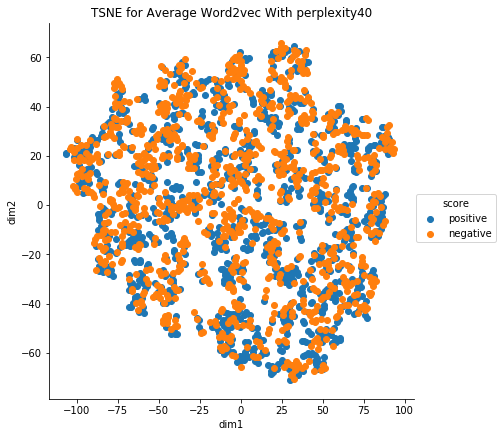

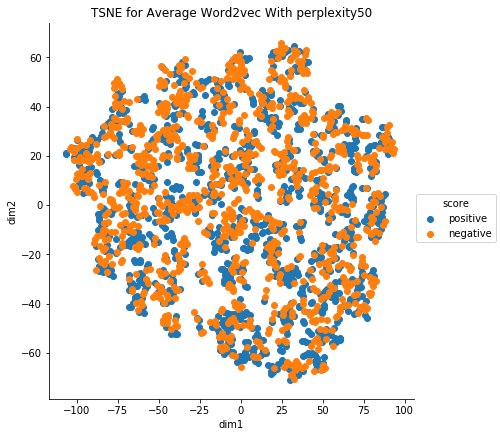

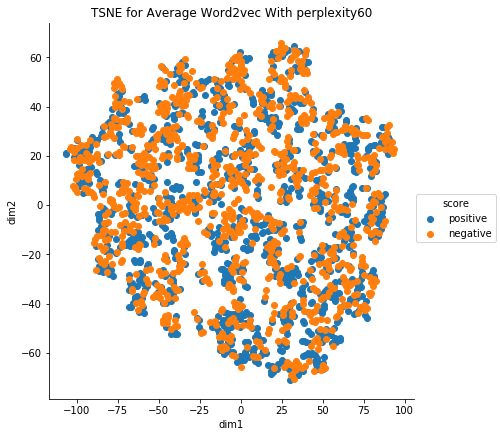

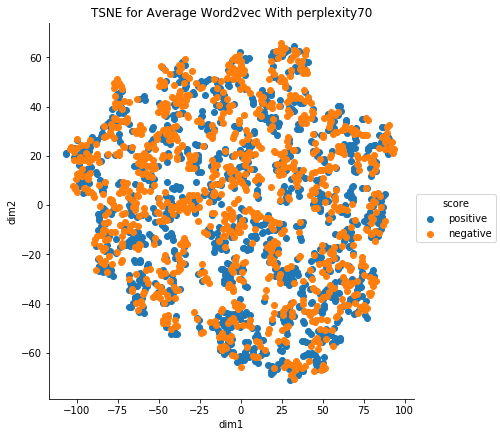

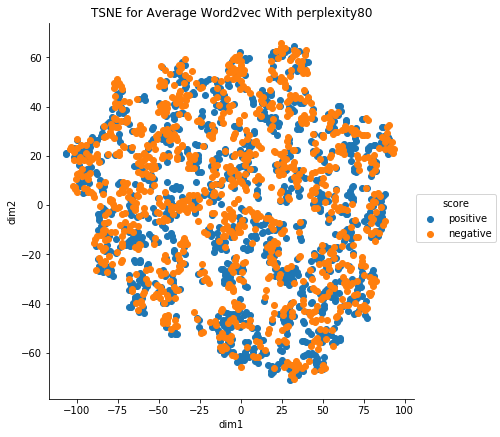

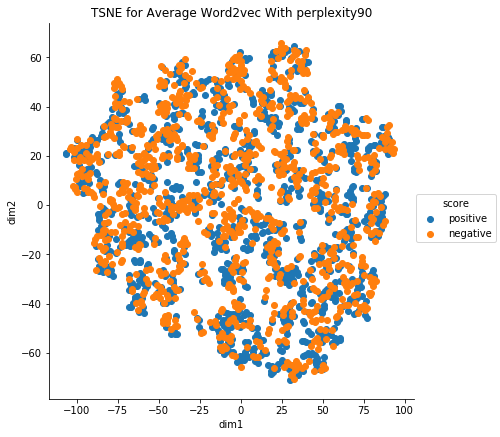

In [56]:
from sklearn.manifold import TSNE
for i in range(40,100,10):
    model = TSNE(n_components=2, random_state=0, perplexity = 20, n_iter = 5000)

    tsne_data = model.fit_transform(sent_vectors)

    tsne_data = np.vstack((tsne_data.T, score_2000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("TSNE for Average Word2vec With perplexity" +str(i))
    plt.show()

**Observation:**

Here, we are unable to separate positive and negative reviews because it overlap each other at all perplexity values.

## TFIDF-W2V

In [57]:
# TF-IDF weighted Word2Vec
tfidf_feat = tf_idf_vect.get_feature_names() # tfidf words/col-names
# final_tf_idf is the sparse matrix with row= sentence, col=word and cell_val = tfidf

tfidf_sent_vectors = []; # the tfidf-w2v for each sentence/review is stored in this list
row=0;
for sent in list_of_sent: # for each review/sentence
    sent_vec = np.zeros(50) # as word vectors are of zero length
    weight_sum =0; # num of words with a valid vector in the sentence/review
    for word in sent: # for each word in a review/sentence
        try:
            vec = w2v_model.wv[word]
            # obtain the tf_idfidf of a word in a sentence/review
            tf_idf = final_tf_idf[row, tfidf_feat.index(word)]
            sent_vec += (vec * tf_idf)
            weight_sum += tf_idf
        except:
            pass
    sent_vec /= weight_sum
    tfidf_sent_vectors.append(sent_vec)
    row += 1
# To know length of tfidf vector
len(tfidf_sent_vectors)

2000

In [58]:
np.isnan(tfidf_sent_vectors)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [59]:
 #To replace nan with 0 and inf with large finite number

tfidf_sent_vectors = np.nan_to_num(tfidf_sent_vectors)

In [61]:
from sklearn.preprocessing import StandardScaler

standardized_data=StandardScaler().fit_transform(tfidf_sent_vectors)
print(standardized_data.shape)

(2000, 50)


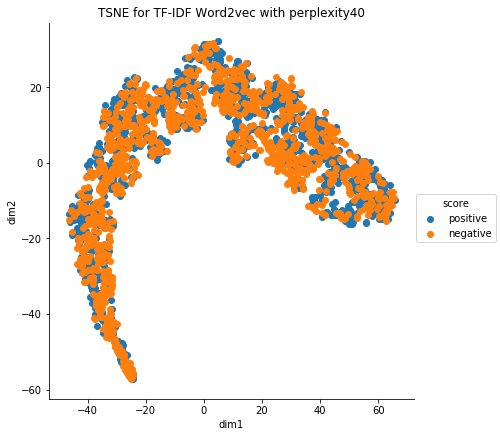

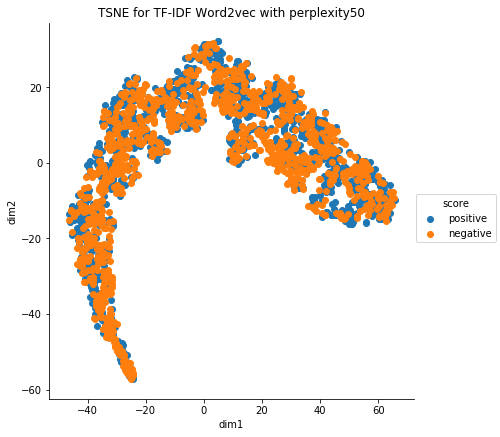

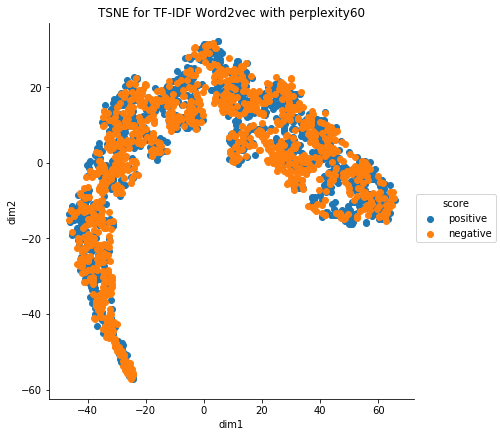

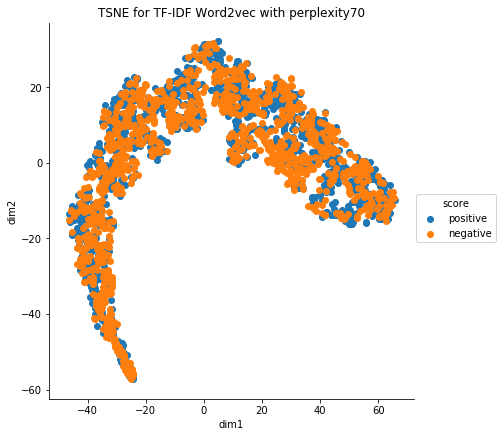

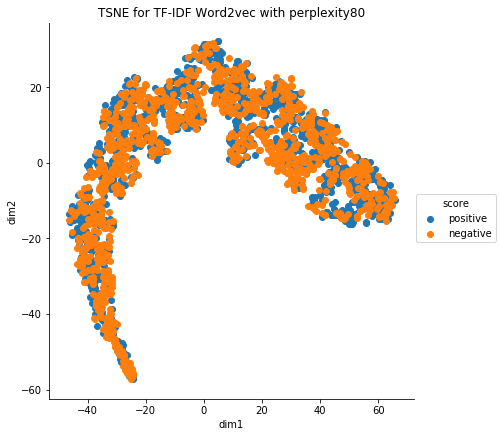

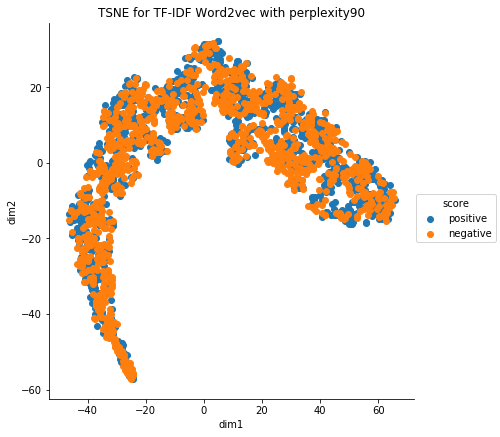

In [63]:
from sklearn.manifold import TSNE
for i in range(40,100,10):
    model = TSNE(n_components=2, random_state=0, perplexity = 50, n_iter = 5000)

    tsne_data = model.fit_transform(tfidf_sent_vectors)

    tsne_data = np.vstack((tsne_data.T, score_2000)).T
    tsne_df = pd.DataFrame(data=tsne_data, columns=("dim1", "dim2", "score"))

# Ploting the result of tsne
    sn.FacetGrid(tsne_df, hue="score", size=6).map(plt.scatter, 'dim1', 'dim2').add_legend()
    plt.title("TSNE for TF-IDF Word2vec with perplexity" +str(i))
    plt.show()


**Observation:**

Both positive and negative reviwes are not well seperated they overlapped each other at all perplexity values from 30 to 90

## Conclusion:

AS none of TSNE representation gives a well separated both +ve and -ve reviews.